<a href="https://colab.research.google.com/github/StephenTheAnalyst/PizzasSalesPython/blob/main/Copy_of_PizzasSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***I did this project using SQL so i felt like recreating this time using python. It is a project on pizzas sales.***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
p = pd.read_csv("/content/pizzas.csv")
pt = pd.read_csv("/content/pizza_types.csv", encoding='latin-1')
o = pd.read_csv("/content/orders.csv")
od = pd.read_csv("/content/order_details.csv")

# **Q1: Retrieve the total number of orders placed.**
## ***Ans: 48620***

In [ ]:
od.head(2)

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1


In [ ]:
od.count()

,0
order_details_id,48620
order_id,48620
pizza_id,48620
quantity,48620


## ***Q2: Calculate the total revenue generated from pizza sales.***
## ***Ans: 817860.05***

In [ ]:
od.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [ ]:
od.revenue = od.merge(p, on='pizza_id')[['quantity','price']]
od.revenue['revenue'] = od.revenue.quantity * od.revenue.price
od.revenue.revenue.sum()

817860.0499999999

# **Q3: Identify the highest-priced pizza.**
## ***Ans: The highest-priced pizza is the_greek_xxl with price of 35.95***

In [ ]:
p.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [ ]:
p.sort_values(by='price', ascending=False).head(1)

,pizza_id,pizza_type_id,size,price
43,the_greek_xxl,the_greek,XXL,35.95


# **Q4: Identify the most common pizza size ordered.**
## ***Ans: The most common pizza size ordered was size S.***

In [ ]:
p.groupby('size').agg({'size':'count'})

,size
size,
L,31
M,31
S,32
XL,1
XXL,1


# **Q5: List the top 5 most ordered pizza types along with their quantities.**

In [ ]:
p.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [ ]:
t1 = pd.merge(pd.merge(p,pt, on= 'pizza_type_id'), od, on='pizza_id')[['name','quantity']]
t1 = t1.groupby('name').agg({'quantity':'sum'}).sort_values(by='quantity', ascending=False).head(5)
t1

,quantity
name,
The Classic Deluxe Pizza,2453
The Barbecue Chicken Pizza,2432
The Hawaiian Pizza,2422
The Pepperoni Pizza,2418
The Thai Chicken Pizza,2371


<ipython-input-71-ae53b926cbaa>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  t1.index_colour = {'The Thai Chicken Pizza':'#ff1dce','The Pepperoni Pizza':'#a020f0','The Hawaiian Pizza':'#ff80be','The Barbecue Chicken Pizza':'#cc00cc','The Classic Deluxe Pizza':'#0000ff'}


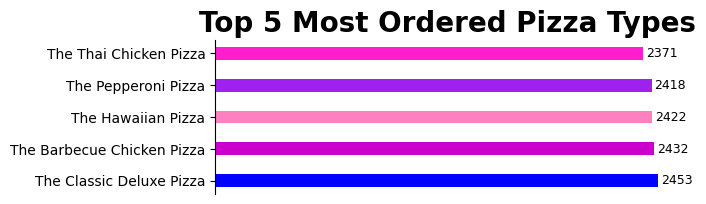

In [ ]:
fig,ax = plt.subplots(figsize=(6,2))
width = 0.4
t1.index_colour = {'The Thai Chicken Pizza':'#ff1dce','The Pepperoni Pizza':'#a020f0','The Hawaiian Pizza':'#ff80be','The Barbecue Chicken Pizza':'#cc00cc','The Classic Deluxe Pizza':'#0000ff'}
color = [t1.index_colour[i] for i in t1.index]
barh = plt.barh(t1.index, t1.quantity, width, color = color)
plt.xlabel('Quantity', fontsize = '16')
plt.title('Top 5 Most Ordered Pizza Types', fontsize = '20', fontweight = 'bold')
ax.spines[['right','top','bottom']].set_visible(False)
ax.xaxis.set_visible(False)
plt.bar_label(barh, t1.quantity, fontsize = '9', padding= 2)
plt.show()


# **Q6: Join the necessary tables to find the total quantity of each pizza category ordered.**

In [ ]:
t2 = pd.merge(pd.merge(p,pt, on= 'pizza_type_id'), od, on='pizza_id')[['category','quantity']]
t2 = t2.groupby('category').agg({'quantity':'sum'})
t2.reset_index(inplace=True)
t2

,category,quantity
0,Chicken,11050
1,Classic,14888
2,Supreme,11987
3,Veggie,11649


# **Q7: Determine the distribution of orders by hour of the day.**

In [ ]:
o.head(2)

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40


In [ ]:
t3 = pd.to_datetime(o['time']).dt.hour.value_counts().rename({'time':'hour'}).reset_index()
t3

<ipython-input-98-3f943854d61b>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  t3 = pd.to_datetime(o['time']).dt.hour.value_counts().rename({'time':'hour'}).reset_index()


,time,count
0,12,2520
1,13,2455
2,18,2399
3,17,2336
4,19,2009
5,16,1920
6,20,1642
7,14,1472
8,15,1468
9,11,1231


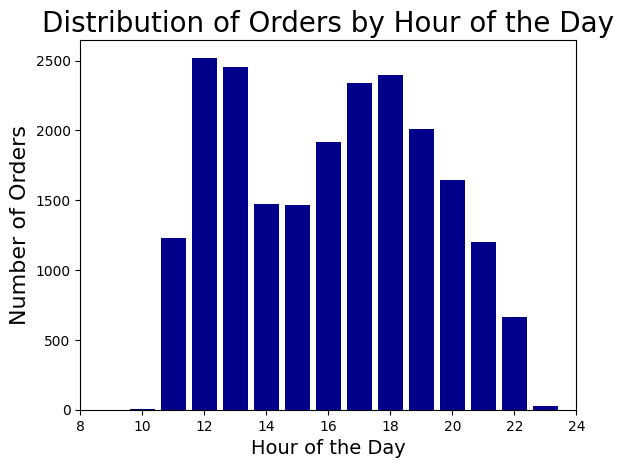

In [ ]:
plt.bar(t3['time'], t3['count'], color = 'darkblue')
plt.xlabel('Hour of the Day', fontsize = '14')
plt.xlim(8,24)
plt.ylabel('Number of Orders', fontsize = '16')
plt.title('Distribution of Orders by Hour of the Day', fontsize = '20')
plt.show()

# **Q8: Join relevant tables to find the category-wise distribution of pizzas.**

In [ ]:
t4 = pd.merge(pd.merge(p,pt, on= 'pizza_type_id'), od, on='pizza_id')
t4.groupby('category').agg({'category':'count'})

,category
category,
Chicken,10815
Classic,14579
Supreme,11777
Veggie,11449


# **Q9: Group the orders by date and calculate the average number of pizzas ordered per day.**
## ***Ans: It happens that all days had an average of 1 order.***

In [ ]:
t5 = pd.merge(o, od, on='order_id').groupby('date').agg({'quantity':'mean'})
t5.reset_index(inplace=True)
t5['quantity'] = round(t5['quantity'])
t5

,date,quantity
0,2015-01-01,1.0
1,2015-01-02,1.0
2,2015-01-03,1.0
3,2015-01-04,1.0
4,2015-01-05,1.0
...,...,...
353,2015-12-27,1.0
354,2015-12-28,1.0
355,2015-12-29,1.0
356,2015-12-30,1.0


# **Q10: Determine the top 3 most ordered pizza types based on revenue.**

### ***Ans: These are the top 3 most ordered pizza types The Thai Chicken Pizza	43434.25,The Barbecue Chicken Pizza	42768.00,The California Chicken Pizza	41409.50.***

In [ ]:
t6 = pd.merge(pd.merge(p,pt, on= 'pizza_type_id'), od, on='pizza_id')[['name','price','quantity']]
t6['revenue'] = t6.price * t6.quantity
t6.groupby('name').agg({'revenue':'sum'}).sort_values(by='revenue', ascending=False).head(3)

,revenue
name,
The Thai Chicken Pizza,43434.25
The Barbecue Chicken Pizza,42768.00
The California Chicken Pizza,41409.50


# **Q11: Calculate the percentage contribution of each pizza type to total revenue.**

In [ ]:
t6['percentage'] = (t6['revenue']/t6.revenue.sum())*100
t7 = t6.groupby('name').agg({'percentage':'sum'}).sort_values(by='percentage', ascending=False)
t7['percentage'] = round(t7['percentage'],2)
t7.reset_index(inplace=True)
t7['percentage'] = t7['percentage'].astype(str) + '%'
t7

,name,percentage
0,The Thai Chicken Pizza,5.31%
1,The Barbecue Chicken Pizza,5.23%
2,The California Chicken Pizza,5.06%
3,The Classic Deluxe Pizza,4.67%
4,The Spicy Italian Pizza,4.26%
5,The Southwest Chicken Pizza,4.24%
6,The Italian Supreme Pizza,4.09%
7,The Hawaiian Pizza,3.95%
8,The Four Cheese Pizza,3.95%
9,The Sicilian Pizza,3.78%


# **Q12: Analyze the cumulative revenue generated over time.**

In [ ]:
t8 = pd.merge(pd.merge(p,od, on = 'pizza_id'), o, on = 'order_id')[['date','quantity','price']]
t8['revenue'] = t8.quantity * t8.price
t8 = t8.groupby('date').agg({'revenue':'sum'}).reset_index()
t8['cumulative_revenue'] = t8.revenue.cumsum()
t8

,date,revenue,cumulative_revenue
0,2015-01-01,2713.85,2713.85
1,2015-01-02,2731.90,5445.75
2,2015-01-03,2662.40,8108.15
3,2015-01-04,1755.45,9863.60
4,2015-01-05,2065.95,11929.55
...,...,...,...
353,2015-12-27,1419.00,810615.80
354,2015-12-28,1637.20,812253.00
355,2015-12-29,1353.25,813606.25
356,2015-12-30,1337.80,814944.05


# **Q13: Determine the top 3 most ordered pizza types based on revenue for each pizza category.**

In [ ]:
t9 = pd.merge(pd.merge(p, pt, on='pizza_type_id'), od, on='pizza_id')[['name', 'category', 'price', 'quantity']]
t9['revenue'] = t9.price * t9.quantity
top_3_by_category = t9.groupby(['category', 'name'])['revenue'].sum().reset_index()
top_3_by_category = top_3_by_category.groupby('category').apply(lambda x: x.nlargest(3, 'revenue')).reset_index(drop=True)
top_3_by_category


,category,name,revenue
0,Chicken,The Thai Chicken Pizza,43434.25
1,Chicken,The Barbecue Chicken Pizza,42768.00
2,Chicken,The California Chicken Pizza,41409.50
3,Classic,The Classic Deluxe Pizza,38180.50
4,Classic,The Hawaiian Pizza,32273.25
5,Classic,The Pepperoni Pizza,30161.75
6,Supreme,The Spicy Italian Pizza,34831.25
7,Supreme,The Italian Supreme Pizza,33476.75
8,Supreme,The Sicilian Pizza,30940.50
9,Veggie,The Four Cheese Pizza,32265.70
